# Principal Component Analysis(PCA) 
降维
目标：方差最大，误差最小
思想：复杂问题简单化

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD

Data Visualization

In [39]:
df = pd.read_csv("iris.data",names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Standardize the Data

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
features={'sepal length','sepal width','petal length','petal width'}
x = df.loc[:,features].values
y = df.loc[:,{'target'}].values

In [ ]:
#y


In [42]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc

array([[-1.31297673e+00, -9.00681170e-01, -1.34127240e+00,
         1.03205722e+00],
       [-1.31297673e+00, -1.14301691e+00, -1.34127240e+00,
        -1.24957601e-01],
       [-1.31297673e+00, -1.38535265e+00, -1.39813811e+00,
         3.37848329e-01],
       [-1.31297673e+00, -1.50652052e+00, -1.28440670e+00,
         1.06445364e-01],
       [-1.31297673e+00, -1.02184904e+00, -1.34127240e+00,
         1.26346019e+00],
       [-1.05003079e+00, -5.37177559e-01, -1.17067529e+00,
         1.95766909e+00],
       [-1.18150376e+00, -1.50652052e+00, -1.34127240e+00,
         8.00654259e-01],
       [-1.31297673e+00, -1.02184904e+00, -1.28440670e+00,
         8.00654259e-01],
       [-1.31297673e+00, -1.74885626e+00, -1.34127240e+00,
        -3.56360566e-01],
       [-1.44444970e+00, -1.14301691e+00, -1.28440670e+00,
         1.06445364e-01],
       [-1.31297673e+00, -5.37177559e-01, -1.28440670e+00,
         1.49486315e+00],
       [-1.31297673e+00, -1.26418478e+00, -1.22754100e+00,
      

# PCA Projection to 2D

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components = 2)

In [45]:
principalCompoments = pca.fit_transform(x_sc)
principalDf = pd.DataFrame(data=principalCompoments,columns=['pc1','pc2'] )

In [46]:
principalDf

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


In [47]:
finalDf = pd.concat([principalDf,df[['target']]],axis=1)

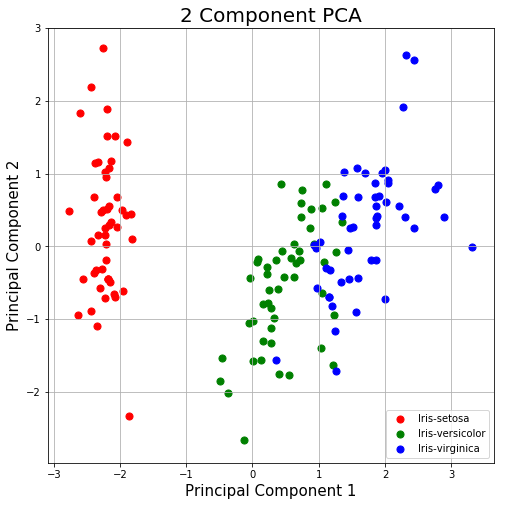

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize=15)
ax.set_ylabel('Principal Component 2',fontsize=15)
ax.set_title('2 Component PCA',fontsize=20)

targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors =['r','g','b']
for target,color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'pc1'],finalDf.loc[indicesToKeep,'pc2'],c = color, s = 50)
ax.legend(targets)
ax.grid()

Explained Variance
The explained variance tell us how much information(variance) can be attibuted to each of the principal compoments.

In [48]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# Boston Dataset

In [49]:
from sklearn.datasets import load_boston
boston = load_boston()
df_x = pd.DataFrame(boston.data,columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [50]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
df_x.shape

(506, 13)

In [51]:
reg = linear_model.LinearRegression()

In [52]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [53]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
reg.score(x_test,y_test)

0.7264701379682973

# PCA

In [20]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
pca = PCA(n_components = 10,whiten='True')
x_pca = pca.fit(df_x).transform(df_x)

In [56]:
pca.explained_variance_

array([3.08895182e+04, 6.25027401e+03, 8.18365244e+02, 2.66683023e+02,
       5.01347040e+01, 2.78967669e+01, 1.61009055e+01, 9.53431045e+00,
       3.27329483e+00, 1.18108745e+00])

In [57]:
reg = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x_pca,df_y,test_size=0.2,random_state=4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
reg.score(x_test,y_test)

0.6901837869213894

In [59]:
svd = TruncatedSVD(n_components=10)
x_svd = svd.fit(df_x).transform(df_x)
reg = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x_svd,df_y,test_size=0.2,random_state=4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
reg.score(x_test,y_test)

0.6822325020984263

In [61]:
df_x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


# An simple example

In [67]:
point = pd.DataFrame({'X':[1,2,3,4,5,6],'Y':[3,5,7,13,11,13]})
point.describe()

,X,Y
count,6.000000,6.000000
mean,3.500000,8.666667
std,1.870829,4.273952
min,1.000000,3.000000
25%,2.250000,5.500000
50%,3.500000,9.000000
75%,4.750000,12.500000
max,6.000000,13.000000


In [68]:
pca = PCA(n_components = 1,whiten='True')
point_pca = pca.fit(point).transform(point)

In [69]:
point_pca

array([[ 1.34052308],
       [ 0.85763734],
       [ 0.37475161],
       [-0.90798656],
       [-0.59101986],
       [-1.0739056 ]])

In [70]:
pca.explained_variance_

array([21.33673523])

In [71]:
pca.explained_variance_ratio_

array([0.98024817])